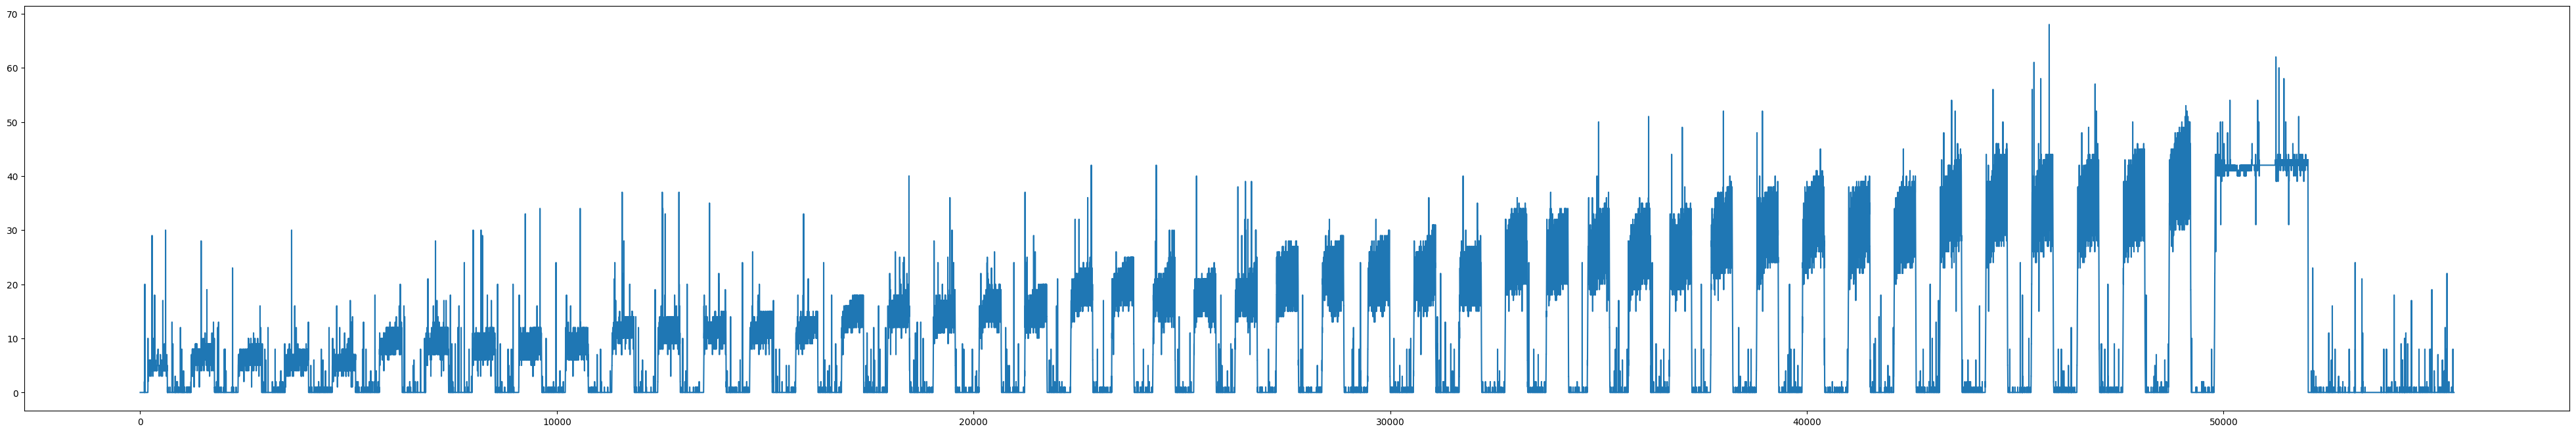

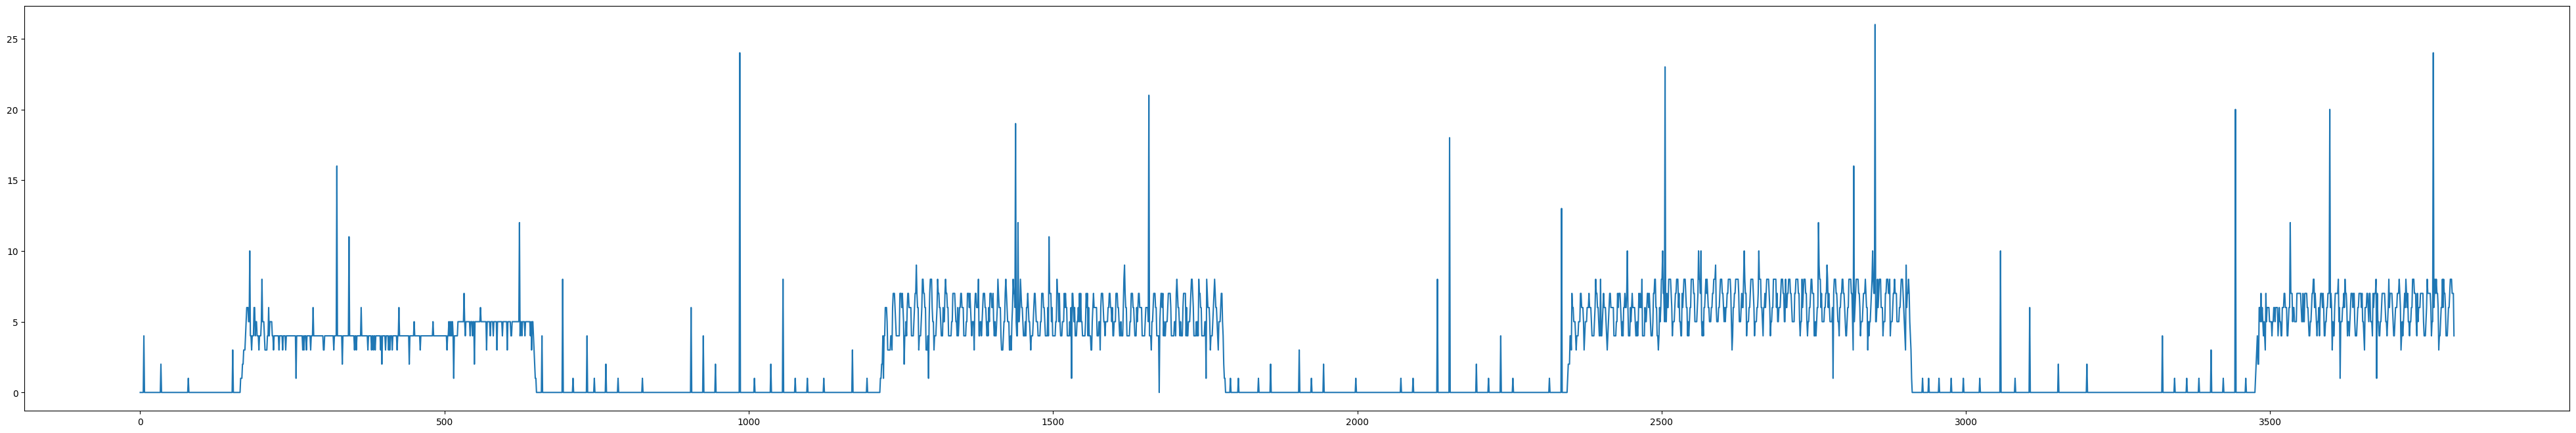

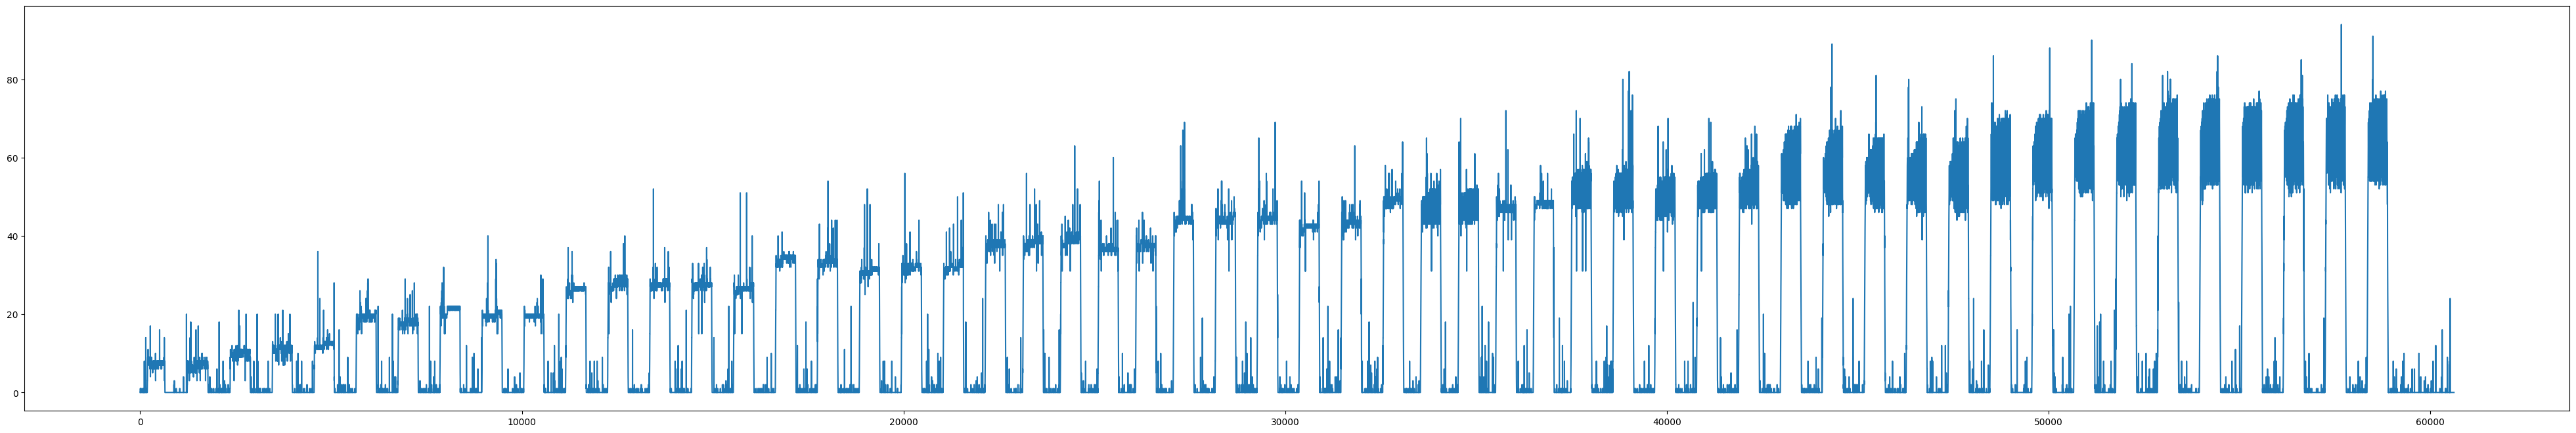

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# acquire the data
def get_data(filename: str):
    datafile = pd.read_csv(filename)
    datafile = datafile.iloc[:, 0].to_numpy()[1:len(datafile)-1]

    return datafile

# hastly prepare the data to be analyzed, avoiding any incorrect recordings in the csv file
def prep_data(data: np.array):
    FSR1_data = []
    FSR2_data = []

    for i in range(len(data)):
        split_point = data[i].split('FSR1:')
        if len(split_point) == 2:
            split_point = split_point[1].split('FSR2:')
            if len(split_point) == 2 and split_point[0] !='43FS1:42': # edge case
                FSR1_data.append(int(split_point[0]))
                FSR2_data.append(int(split_point[1]))

    return np.array(FSR1_data), np.array(FSR2_data)

# take a windowed average to gather more smooth data
def windowed_avg(data: np.array, window_size):
    average = []
    for i in range(len(data) - window_size):
        mean = 0
        for j in range(window_size):
            mean += data[i + j] / window_size

        average.append(mean)

    return average


csv_files = ['FSR Calibration 1.csv', 'FSR Calibration 2.csv', 'FSR Calibration 3.csv']

for csv_file in csv_files:
    raw_data = get_data(filename=csv_file)
    fsr_data, _ = prep_data(data=raw_data)
    average = windowed_avg(data=fsr_data, window_size=1)

    x = np.linspace(0, len(average), len(average))

    fig, ax = plt.subplots(figsize=(50, 8))
    ax.plot(x, average)
    plt.show()

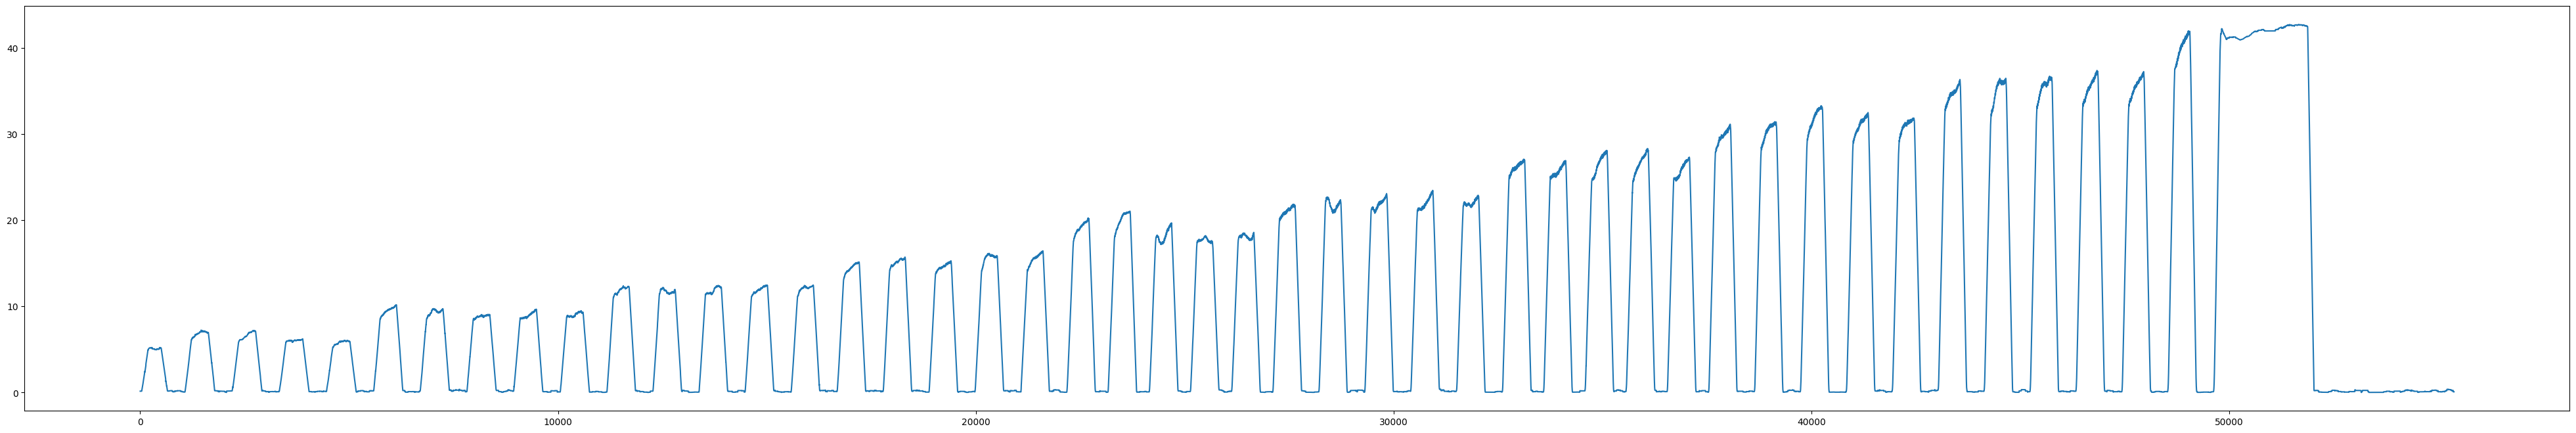

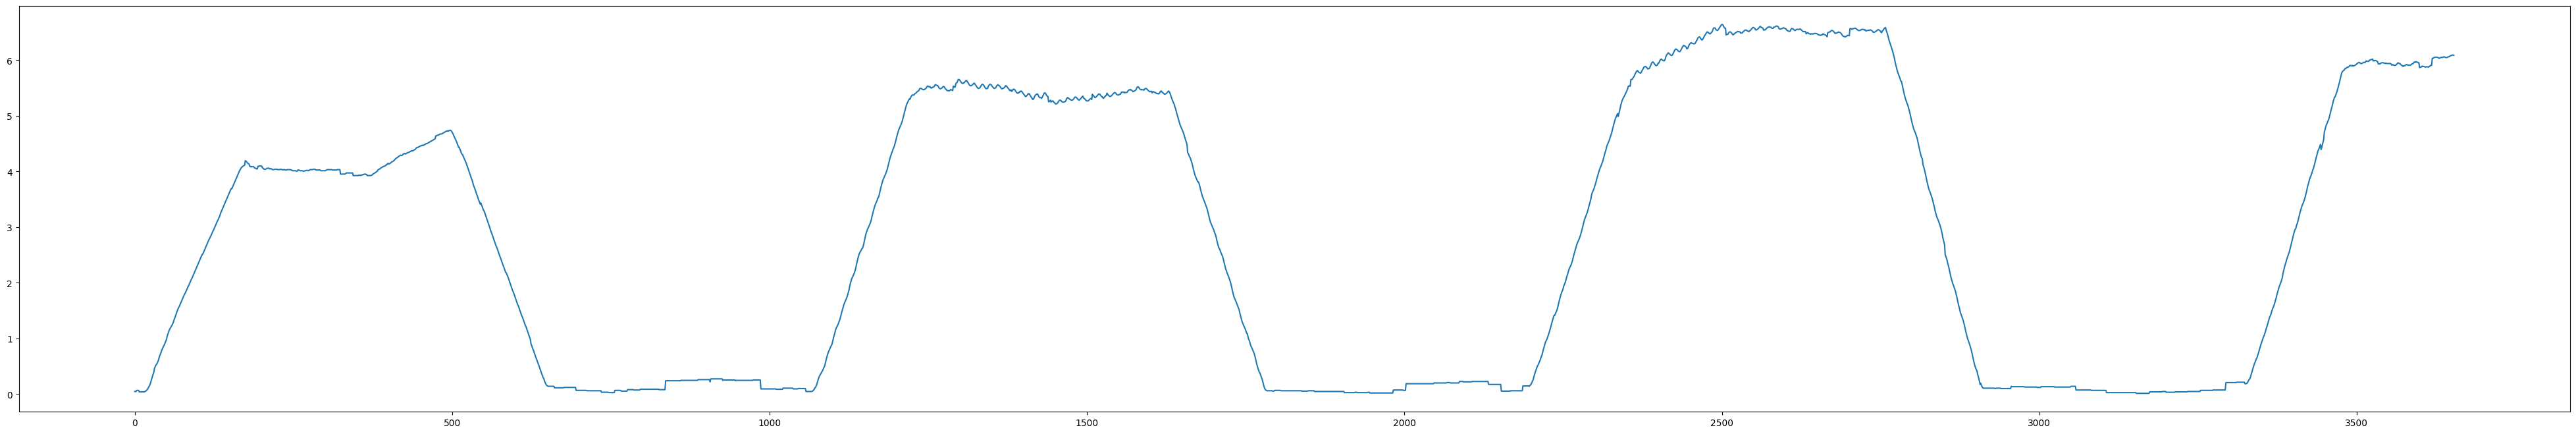

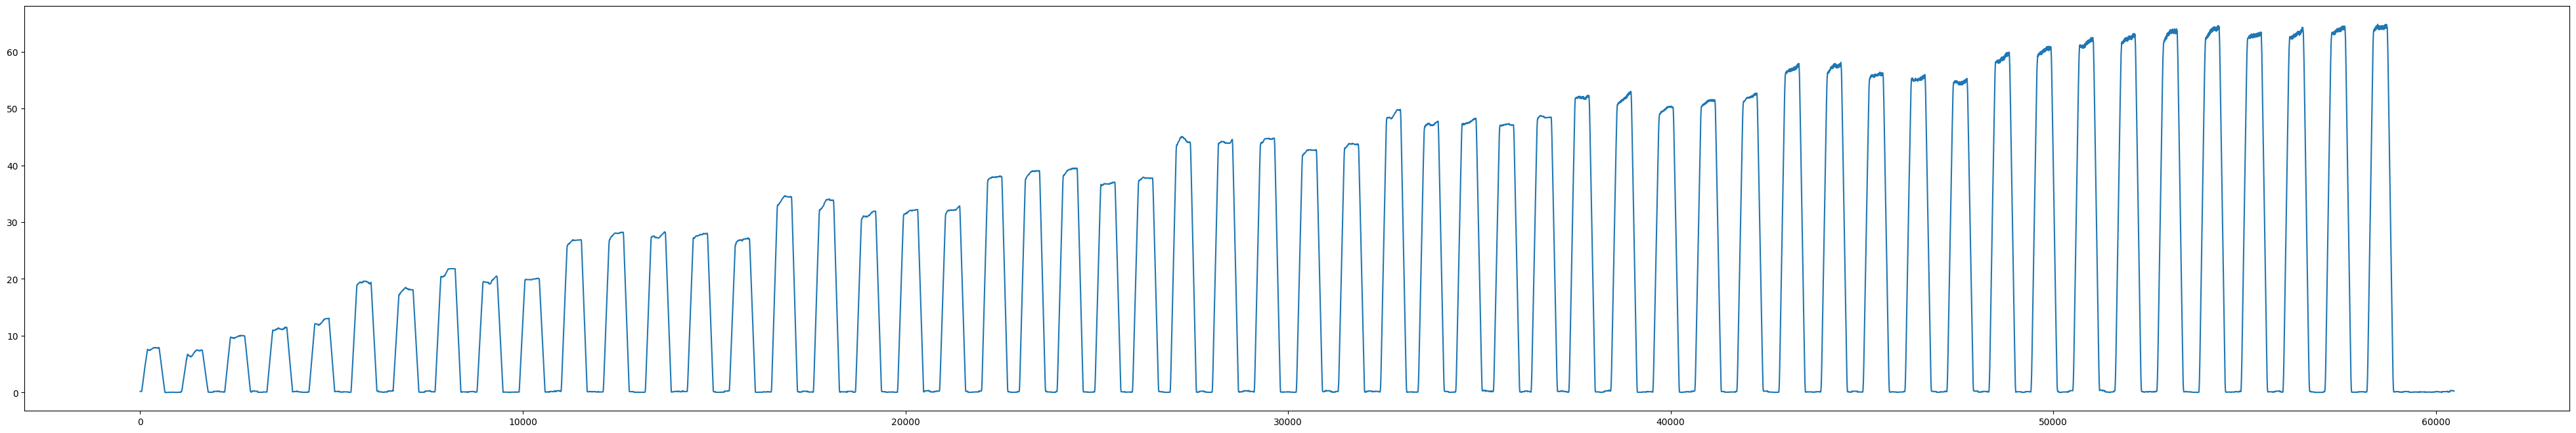

In [10]:
# Windowed Average for Smoother Plot

for csv_file in csv_files:
    raw_data = get_data(filename=csv_file)
    fsr_data, _ = prep_data(data=raw_data)
    average = windowed_avg(data=fsr_data, window_size=150)

    x = np.linspace(0, len(average), len(average))

    fig, ax = plt.subplots(figsize=(50, 8))
    ax.plot(x, average)
    plt.show()